In [15]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm


In [16]:
np.set_printoptions(precision = 4,suppress = True)
plt.figure(figsize=(10,10))
%matplotlib inline
plt.style.use('seaborn-whitegrid')


In [17]:
data = pd.read_csv('GENERAL.csv')
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [24]:
x = data.drop(['CUST_ID', 'BALANCE_FREQUENCY',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], axis=1 ).astype(float)
x=x.dropna()

Z = linkage(x.values, 'ward')

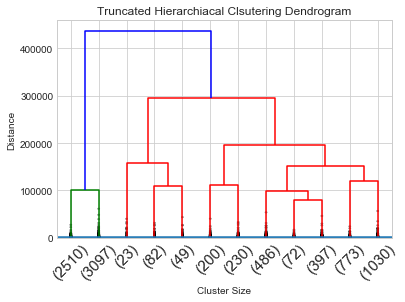

In [26]:
dendrogram(Z,truncate_mode = 'lastp', p=12, leaf_rotation= 45 , leaf_font_size = 15, show_contracted =True)
plt.title('Truncated Hierarchiacal Clsutering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)

plt.show()

C:\Users\Akshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
C:\Users\Akshay\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


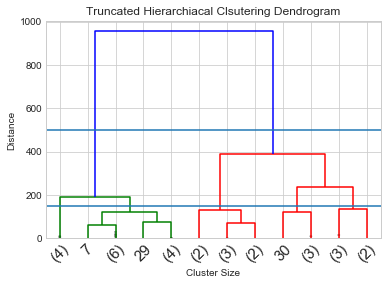

In [42]:
data = pd.read_csv('mtcars.csv')
data.columns


a = data.ix[:,(1,3,4,6)]
b = data.ix[:,(9)]
Z = linkage(a.values, 'ward')

dendrogram(Z,truncate_mode = 'lastp', p=12, leaf_rotation= 45 , leaf_font_size = 15, show_contracted =True)
plt.title('Truncated Hierarchiacal Clsutering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500)
plt.axhline(y=150)

plt.show()

In [44]:
k = 2
Hclustering = AgglomerativeClustering(n_clusters=k,affinity = 'euclidean',linkage= 'ward')
Hclustering.fit(a)
sm.accuracy_score(b,Hclustering.labels_)

0.78125

In [45]:
k = 2
Hclustering = AgglomerativeClustering(n_clusters=k,affinity = 'euclidean',linkage= 'complete')
Hclustering.fit(a)
sm.accuracy_score(b,Hclustering.labels_)

0.4375

In [46]:
k = 2
Hclustering = AgglomerativeClustering(n_clusters=k,affinity = 'euclidean',linkage= 'average')
Hclustering.fit(a)
sm.accuracy_score(b,Hclustering.labels_)

0.78125

In [47]:
k = 2
Hclustering = AgglomerativeClustering(n_clusters=k,affinity = 'manhattan',linkage= 'average')
Hclustering.fit(a)
sm.accuracy_score(b,Hclustering.labels_)

0.71875